In [1]:
import pandas as pd 


from bs4 import BeautifulSoup

import regex as re 
import string
import nltk
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install wordcloud

In [3]:
df= pd.read_csv('../DATASET/Google_data(updated)')

#  Understanding Data

In [4]:
df.head()

,title,Published_on,News_agency,URL,summary,Country,language,tag
0,Rider Strong and Will Friedle Detail Alleged M...,"Mon, 19 Feb 2024 16:57:00 GMT",Variety,https://news.google.com/rss/articles/CBMiamh0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
1,'Boy Meets World' Cast Addresses Brian Peck's ...,"Mon, 19 Feb 2024 19:35:33 GMT",Us Weekly,https://news.google.com/rss/articles/CBMicmh0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
2,'Boy Meets World' stars discuss former friends...,"Mon, 19 Feb 2024 23:46:37 GMT",Entertainment Weekly News,https://news.google.com/rss/articles/CBMiaGh0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
3,Charted: Share of World Forests by Country - V...,"Sat, 17 Feb 2024 21:01:03 GMT",Visual Capitalist,https://news.google.com/rss/articles/CBMiS2h0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
4,FBI and allies seize dark-web site of world’s ...,"Tue, 20 Feb 2024 00:10:00 GMT",CNN,https://news.google.com/rss/articles/CBMiV2h0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World


In [5]:
df.sample(5)

,title,Published_on,News_agency,URL,summary,Country,language,tag
10815,'It affects every person in New York State': B...,"Mon, 19 Feb 2024 22:12:18 GMT",WKBW 7 News Buffalo,https://news.google.com/rss/articles/CBMiiQFod...,"<a href=""https://news.google.com/rss/articles/...",CN,en,Business
2085,English farmers to be offered ‘largest ever’ g...,"Mon, 19 Feb 2024 22:30:00 GMT",The Guardian,https://news.google.com/rss/articles/CBMihwFod...,"<a href=""https://news.google.com/rss/articles/...",GB,en,Environment
12496,Major Area Health Care Partners Announce $50 M...,"Mon, 19 Feb 2024 22:13:52 GMT",Spectrum Health Newsroom,https://news.google.com/rss/articles/CBMioAFod...,"<a href=""https://news.google.com/rss/articles/...",RU,en,Health
10502,"Guest Post: For Real E-bike Safety, We Need Sa...","Mon, 19 Feb 2024 16:09:52 GMT",BikinginLA,https://news.google.com/rss/articles/CBMikAFod...,"<a href=""https://news.google.com/rss/articles/...",JP,en,Education
14526,Embracing technology helps modern organization...,"Mon, 19 Feb 2024 20:54:22 GMT",BOSS Magazine,https://news.google.com/rss/articles/CBMiXWh0d...,"<a href=""https://news.google.com/rss/articles/...",IN,en,Technology


In [6]:
df.shape

(15347, 8)

In [7]:
df['summary'][0]

'<a href="https://news.google.com/rss/articles/CBMiamh0dHBzOi8vdmFyaWV0eS5jb20vMjAyNC90di9uZXdzL3JpZGVyLXN0cm9uZy13aWxsLWZyaWVkbGUtYnJpYW4tcGVjay1ncm9vbWluZy1ib3ktbWVldHMtd29ybGQtMTIzNTkxNDU0NS_SAW5odHRwczovL3ZhcmlldHkuY29tLzIwMjQvdHYvbmV3cy9yaWRlci1zdHJvbmctd2lsbC1mcmllZGxlLWJyaWFuLXBlY2stZ3Jvb21pbmctYm95LW1lZXRzLXdvcmxkLTEyMzU5MTQ1NDUvYW1wLw?oc=5" target="_blank">Rider Strong and Will Friedle Detail Alleged Manipulation and Grooming by ‘Boy Meets World’ Guest Star Brian Peck</a>&nbsp;&nbsp;<font color="#6f6f6f">Variety</font>'

In [ ]:
df.columns

In [8]:
df['tag'].value_counts()

World            1325
Entertainment    1307
Education        1289
Business         1287
Environment      1284
Sports           1280
Finance          1278
Science          1270
Technology       1269
Health           1265
Nation           1256
Politics         1237
Name: tag, dtype: int64

In [9]:
df['Country'].value_counts()

IN    1202
CA    1193
GB    1190
US    1179
DE    1179
FR    1179
ES    1179
IT    1179
JP    1179
CN    1179
RU    1179
BR    1179
AU    1151
Name: Country, dtype: int64

In [10]:
df['News_agency'].value_counts()

Yahoo Finance         575
CNN                   504
Business Insider      472
CBS Sports            337
The Guardian          319
                     ... 
WKU News                1
WSB Atlanta             1
GuelphToday             1
CTV News Vancouver      1
DD News                 1
Name: News_agency, Length: 1318, dtype: int64

In [11]:
df['language'].value_counts()

en    15347
Name: language, dtype: int64

# Extracting only date from published_on

In [12]:
df['Published_on'] = pd.to_datetime(df['Published_on'], format="%a, %d %b %Y %H:%M:%S %Z")
df['year'] = df['Published_on'].dt.year

In [13]:
df['year'].value_counts()

2024    15146
2023      196
2020        2
2018        2
2019        1
Name: year, dtype: int64

# Checking for Null Values

In [14]:
df.isna().mean() #checking percentage of null values 

title           0.0
Published_on    0.0
News_agency     0.0
URL             0.0
summary         0.0
Country         0.0
language        0.0
tag             0.0
year            0.0
dtype: float64

# Checking for class imbalance

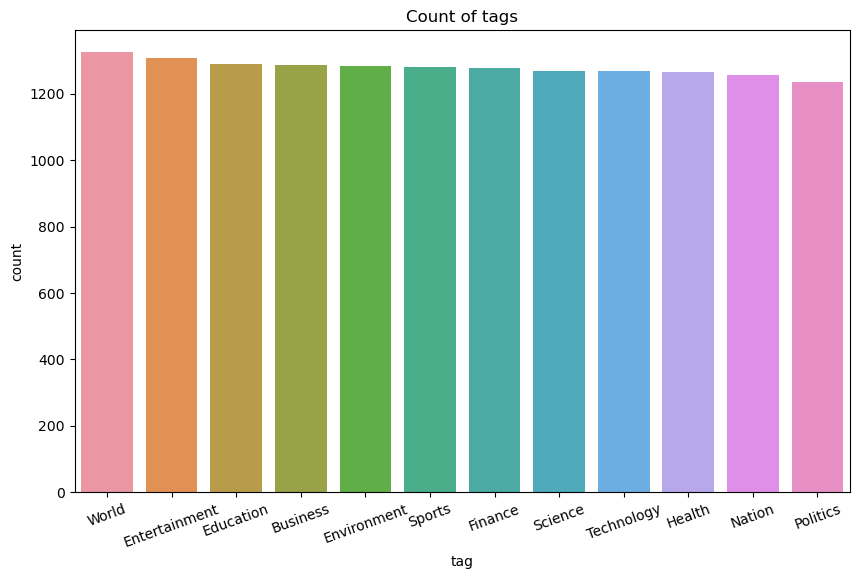

In [16]:
#using a countplot to see the distribution of tags
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='tag',order=df['tag'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of tags')
plt.show()

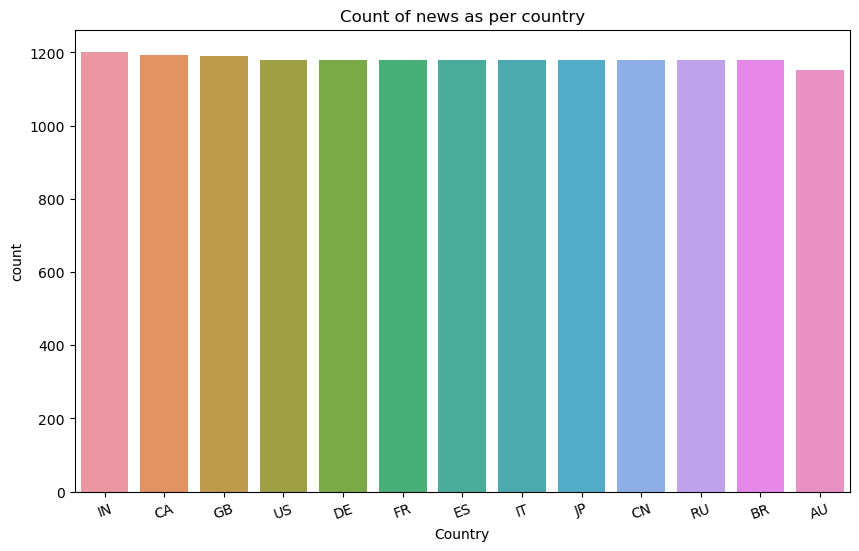

In [17]:
#using a countplot to get count of news as per country
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Country',order=df['Country'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of news as per country')
plt.show()

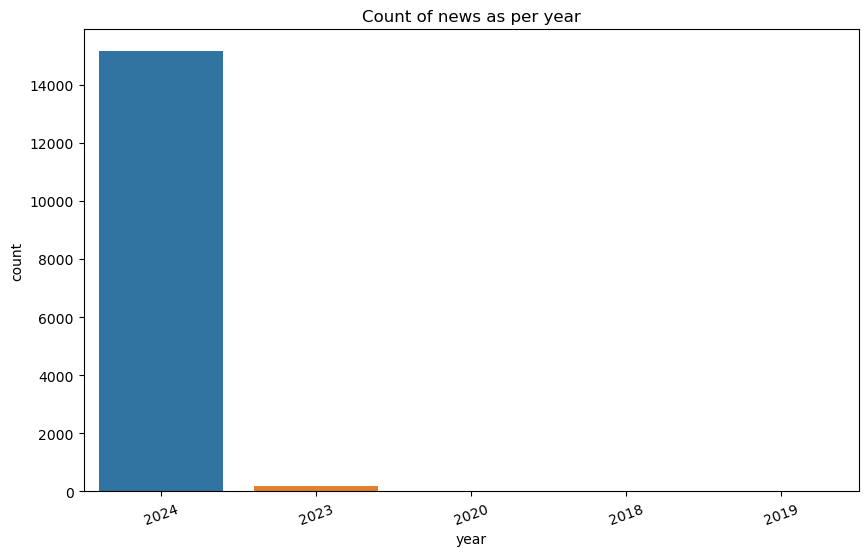

In [18]:
#using a countplot to get count of news as per year
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='year',order=df['year'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of news as per year')
plt.show()

<Axes: ylabel='tag'>

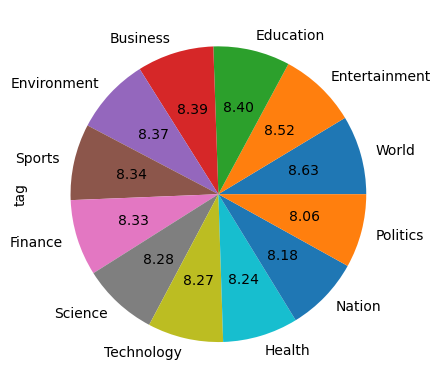

In [19]:
df['tag'].value_counts().plot(kind='pie',autopct='%.2f')

# Remove HTML content

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return re.sub(r'(\xa0)', '', soup.get_text())

df['summary'] = df['summary'].apply(strip_html)
df['summary'][1]

"'Boy Meets World' Cast Addresses Brian Peck's Sexual Abuse ConvictionUs Weekly"

# Merging Summary and Title

In [21]:
df['Merged'] = df['title'] + ' - ' + df['summary']

In [38]:
df['Merged'][1500]

'sheffield forgemasters announces global nuclear welding technology bdaily sheffield forgemasters announces global nuclear welding technologybdaily'

# Convert to lowercase

In [23]:
df['Merged'] = df['Merged'].apply(lambda x: x.lower())
df['Merged'][1]

"'boy meets world' cast addresses brian peck's sexual abuse conviction - us weekly - 'boy meets world' cast addresses brian peck's sexual abuse convictionus weekly"

# Remove Punctuation


In [24]:
def punctuation_removal(text):
    sp = string.punctuation
    sp.join('“”’')
    for p in sp:
        text = text.replace(p, "")
    return text

df['Merged'] = df['Merged'].apply(punctuation_removal)
df['Merged'][0]

'rider strong and will friedle detail alleged manipulation and grooming by ‘boy meets world’ guest star brian peck  variety  rider strong and will friedle detail alleged manipulation and grooming by ‘boy meets world’ guest star brian peckvariety'

# Tokenisation 

In [25]:
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens


df['Merged'] = df['Merged'].apply(tokenization)


In [26]:
df[['Merged']]

,Merged
0,"[rider, strong, and, will, friedle, detail, al..."
1,"[boy, meets, world, cast, addresses, brian, pe..."
2,"[boy, meets, world, stars, discuss, former, fr..."
3,"[charted, share, of, world, forests, by, count..."
4,"[fbi, and, allies, seize, darkweb, site, of, w..."
...,...
15342,"[capital, small, finance, bank, ipo, allotment..."
15343,"[capital, one, to, buy, discover, financial, i..."
15344,"[municipal, finance, shapes, urban, climate, a..."
15345,"[earnings, season, ends, today, mm, muthoot, f..."


# Remove Stopwords

In [27]:
stopwords = nltk.corpus.stopwords.words('english')
i=0
def remove_stopwords(text):
    output = []
    for w in text:
        if w not in stopwords and len(w)>4:
            output.append(w)
    return output

df['Merged'] = df['Merged'].apply(remove_stopwords)


In [28]:
df[['Merged']]

,Merged
0,"[rider, strong, friedle, detail, alleged, mani..."
1,"[meets, world, addresses, brian, pecks, sexual..."
2,"[meets, world, stars, discuss, former, friends..."
3,"[charted, share, world, forests, country, visu..."
4,"[allies, seize, darkweb, world, prolific, rans..."
...,...
15342,"[capital, small, finance, allotment, finalised..."
15343,"[capital, discover, financial, allstock, reute..."
15344,"[municipal, finance, shapes, urban, climate, a..."
15345,"[earnings, season, today, muthoot, finance, am..."


# Lemmatize the words

In [29]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

df['Merged'] = df['Merged'].apply(lemmatizer)


In [30]:
df[['Merged']][:5]

,Merged
0,rider strong friedle detail alleged manipulati...
1,meet world address brian peck sexual abuse con...
2,meet world star discus former friendship convi...
3,charted share world forest country visual capi...
4,ally seize darkweb world prolific ransomware a...


# WordCloud

In [31]:
from wordcloud import WordCloud


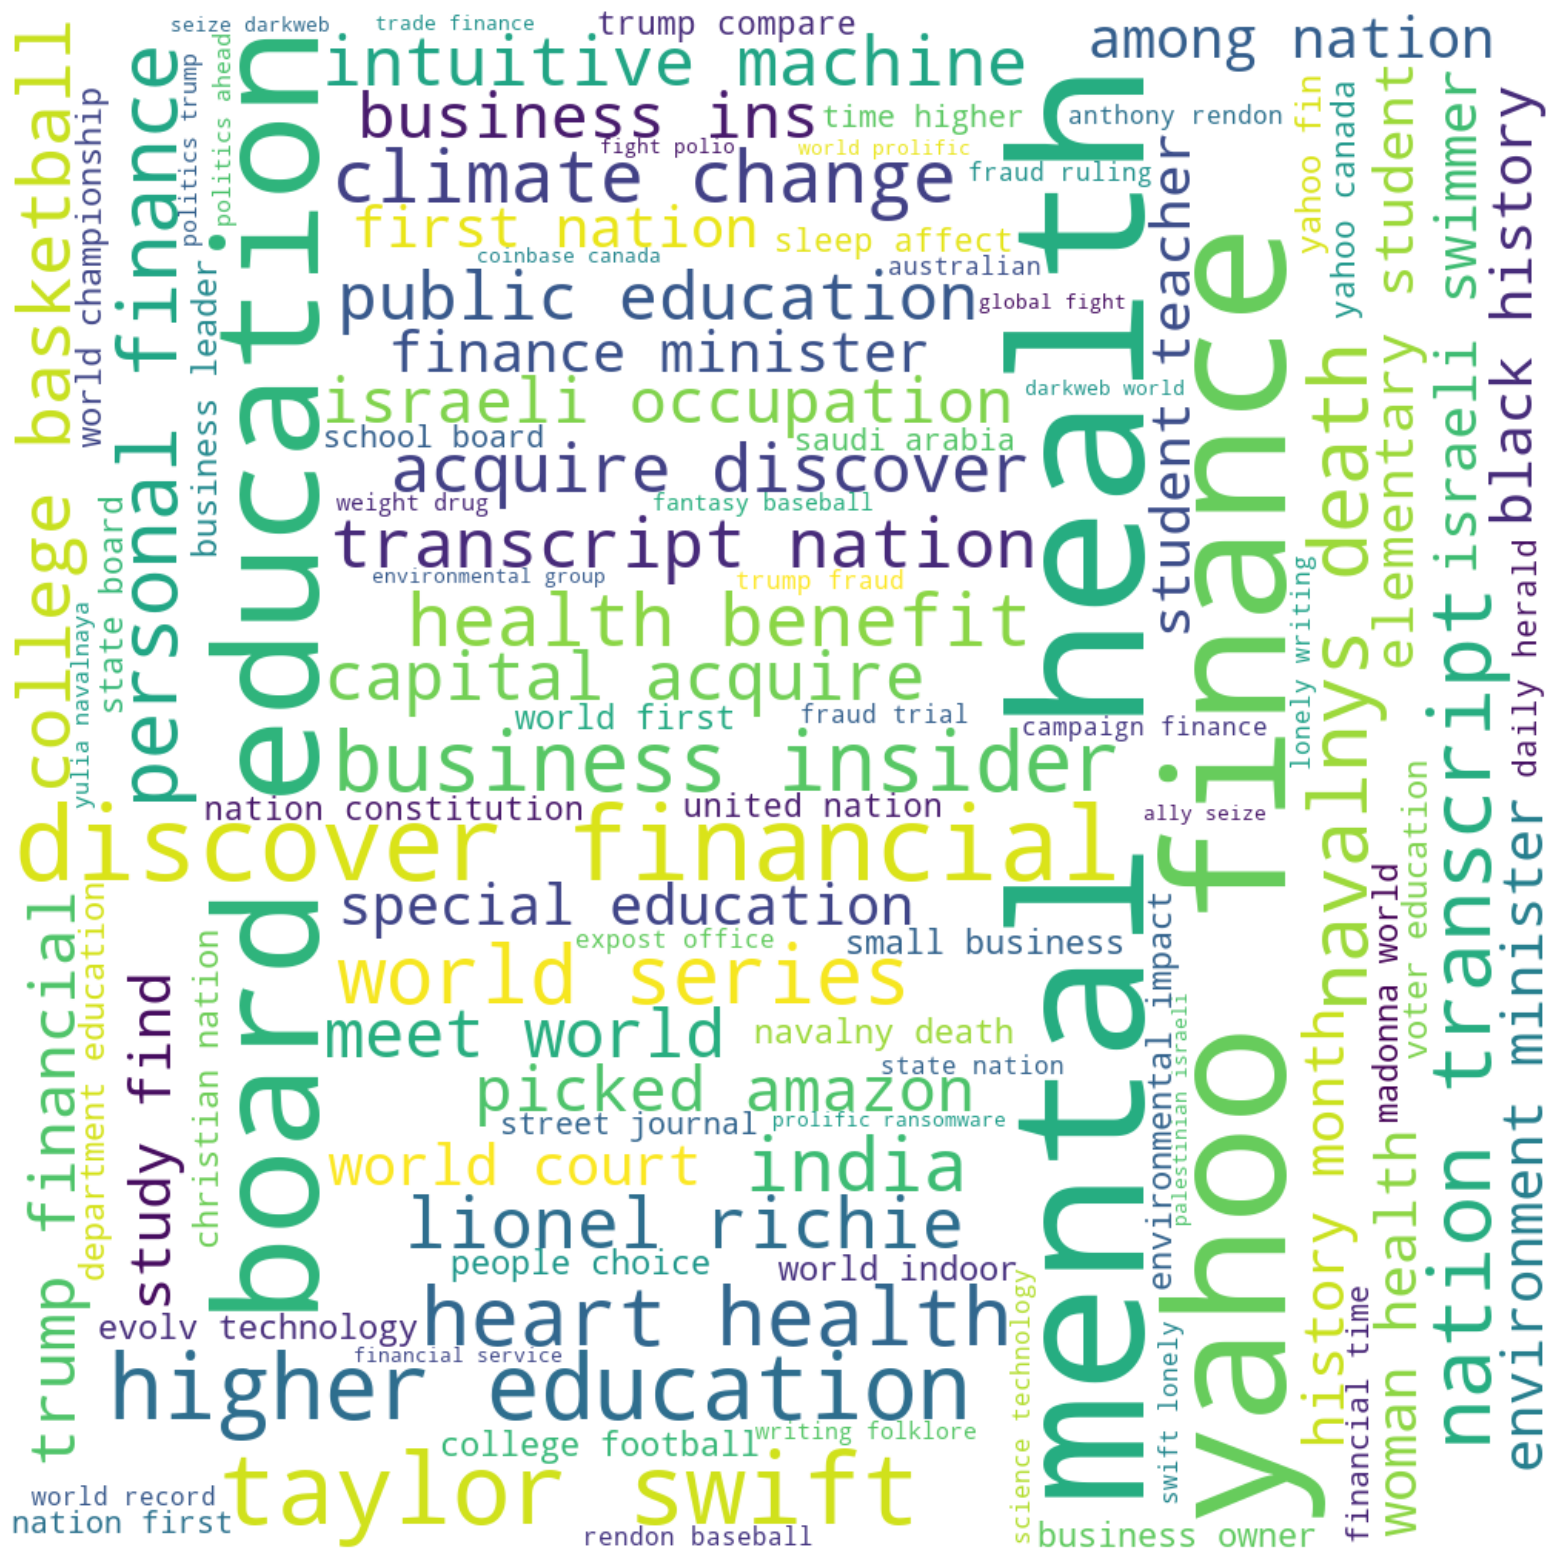

In [32]:
# Generate a word cloud image
text= df['Merged'].to_string()

plt.figure(figsize = (20,20))

wordcloud = WordCloud(max_words = 100 , width = 1000 , height = 1000 , background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

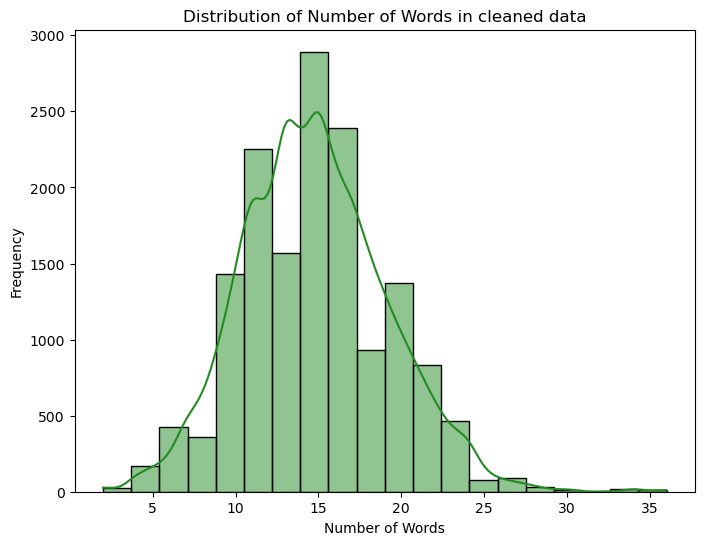

In [33]:
# showing the frequency distribution of words
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['Merged'].apply(lambda x: len(x.split())), bins=20, kde=True, color='forestgreen')
plt.title('Distribution of Number of Words in cleaned data')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Save Preprocessed data 

In [34]:
df.to_csv("../DATASET/PreprocessedData.csv", index=False)